### <font color='black'>Esercizio 11.1

Questa esercitazione ha lo scopo di studiare le reti neurali e capire come i parametri costruttivi e di apprendimento vadano ad influenzare le prestazioni di questa tecnica. 

Il primo esercizio ha come scopo quello di realizzare il fit di un set di dati $(x,y)$ che mostrano un andamento lineare. La funzione che ne approssima l'andamento è la seguente: 
$f(x)=2x+1$
I dati sono stati generati in modo che si discostino dall'andamento ideale per via di un rumore gaussiano.
La rete neaurale, che ha lo scopo di predirre il target $y$ dato un elemento $x$, è formata da un solo layer con un solo neurone. 

In questa primo esercizio abbiamo studiato come il potere predittivo di questa rete varia al variare dei parametri di traning $N_{train}$ (numero di dati di training) e $N_{epochs}$. In oltre abbiamo indagato come il valore del rumore $\sigma$ influenzi il fit.  
Abbiamo sceltro di indagare il comportamento della rete con i seguenti valori dei paramtri:

$N_{train}= 500$, $1000$, $2000$

$N_{epoch}= 10$ , $100$, $250$

$\sigma = 0.1$, $0.3$, $0.5$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)#genera 100 punti distrbuiti unif
x_valid = np.random.uniform(-1, 1, 100)#genera 10 pti distribuiti unif
x_valid.sort()
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect
y_target = m * x_valid + b # ideal (target) linear function

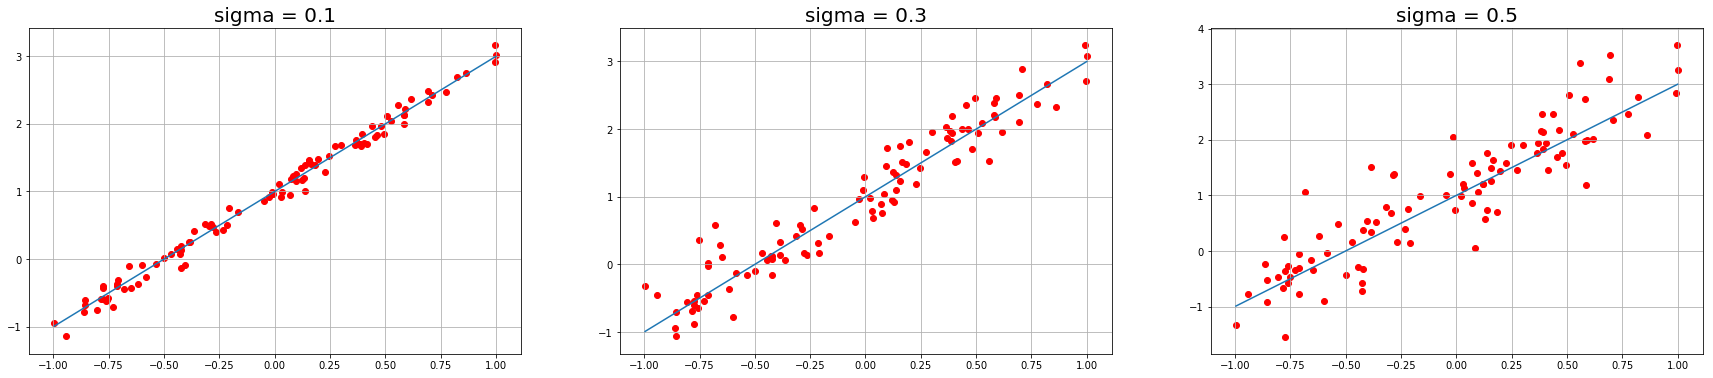

In [2]:
sigma = [0.1, 0.3, 0.5]
N_epoch= [10 , 100, 250]
N_train=[500, 1000, 2000] #anche da 50 ma fa schifo
plt.figure(figsize=(30,6))
plt.subplot(1,3,1)
y_train = np.random.normal(m * x_train + b, sigma[0]) 
y_valid = np.random.normal(m * x_valid + b, sigma[0])
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title('sigma = 0.1', fontsize=20)
plt.grid(True);

plt.subplot(1,3,2)
y_train = np.random.normal(m * x_train + b, sigma[1]) 
y_valid = np.random.normal(m * x_valid + b, sigma[1])
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title('sigma = 0.3', fontsize=20)
plt.grid(True);

plt.subplot(1,3,3)
y_train = np.random.normal(m * x_train + b, sigma[2]) 
y_valid = np.random.normal(m * x_valid + b, sigma[2])
plt.plot(x_valid, y_target)
plt.scatter(x_valid, y_valid, color='r')
plt.title('sigma = 0.5', fontsize=20)
plt.grid(True); 
plt.show()

In [8]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

Mostriamo di seguito il codice usato per studiare le perfomrance delle varie reti neurali. Poichè il numero di reti neurali studiate è cospiquo abbiamo deciso di mostrare solo i grafici significativi.

sigma=0.1


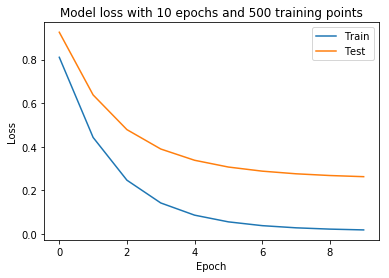

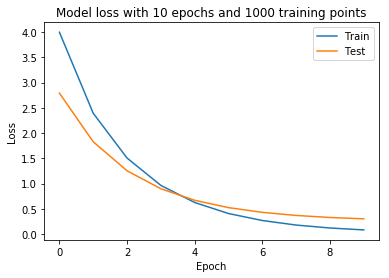

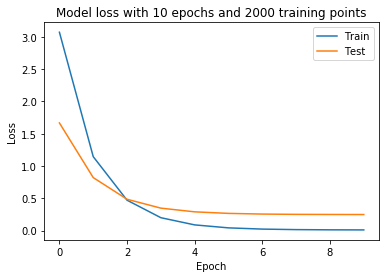

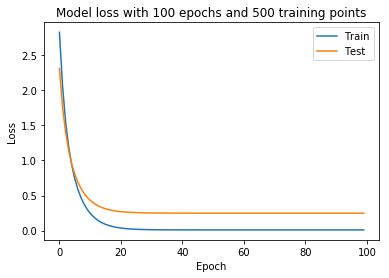

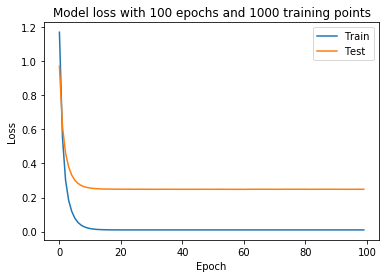

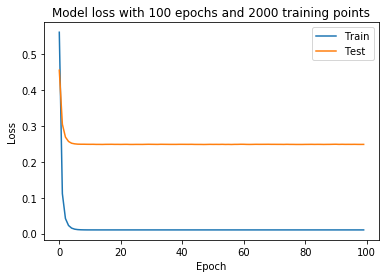

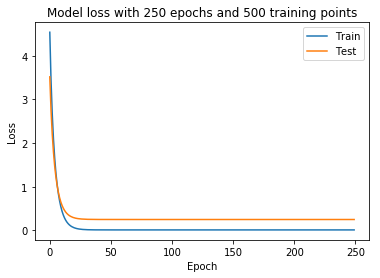

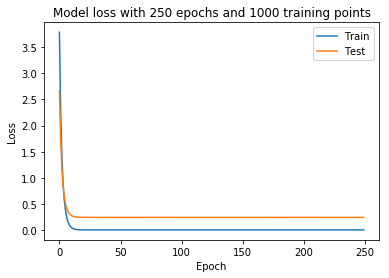

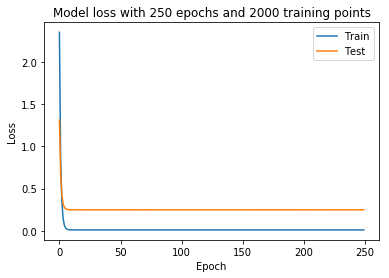

sigma=0.3


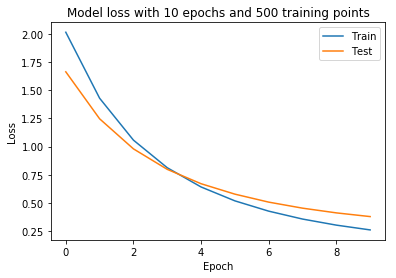

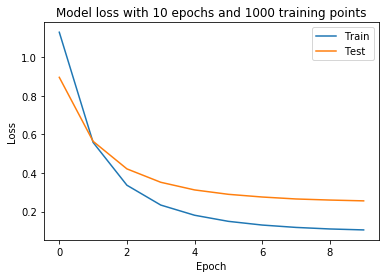

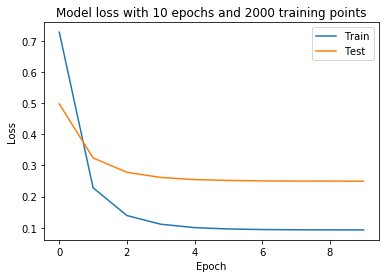

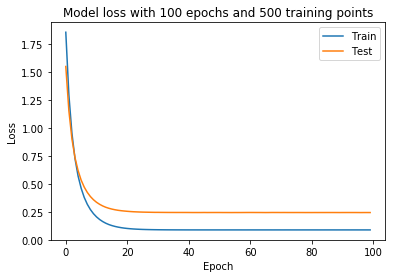

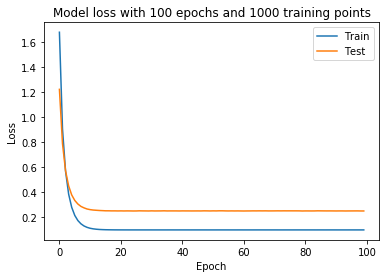

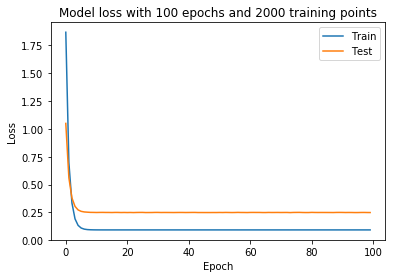

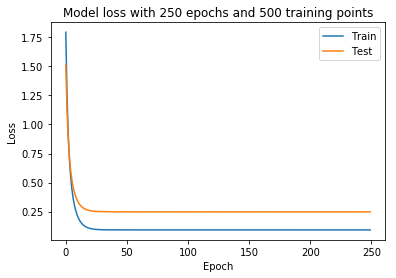

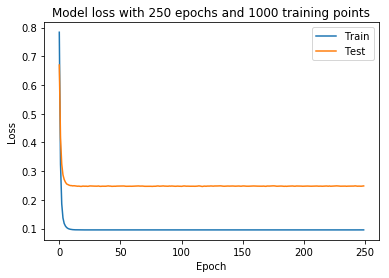

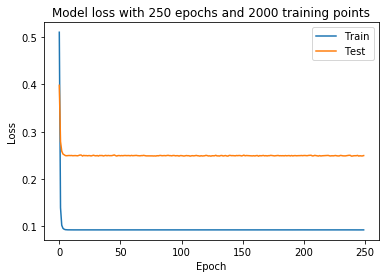

sigma=0.5


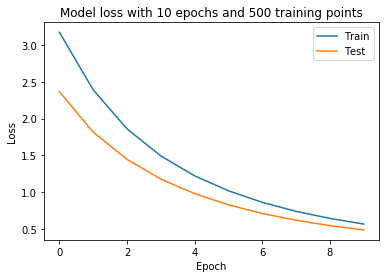

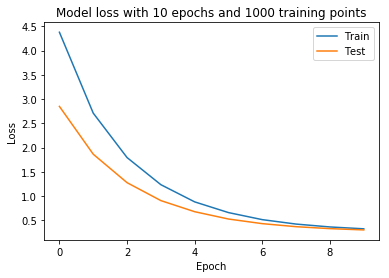

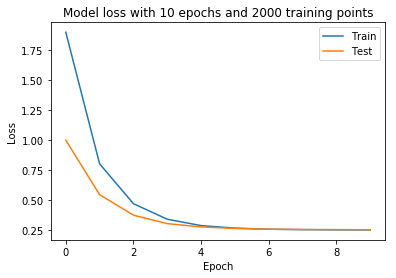

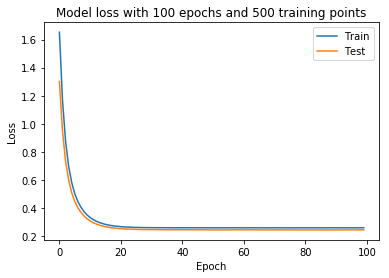

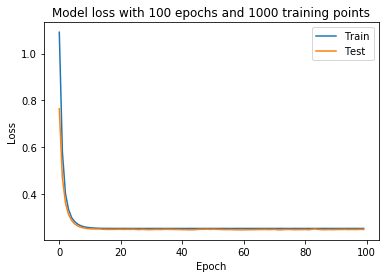

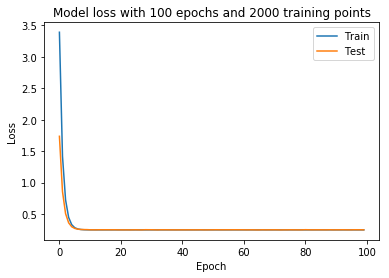

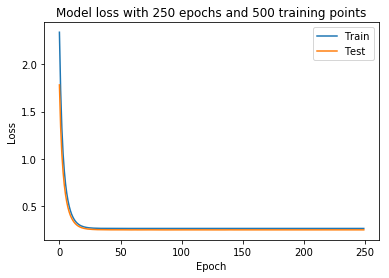

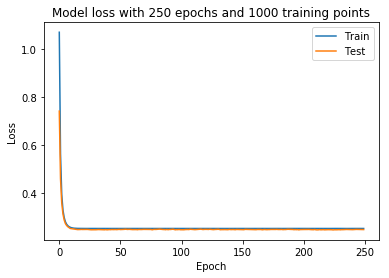

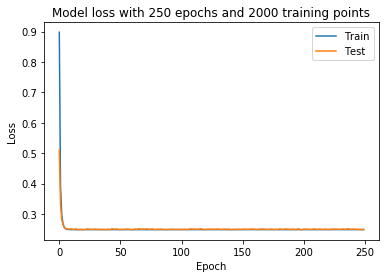

In [5]:
x=[]
y=[]
contatore=0
for i in sigma:
    print('sigma='+str(i))
    y_train = np.random.normal(m * x_train + b, i)
    for j in N_epoch:
        for k in N_train:
            contatore= contatore+1
            for s in range (0,k):
                x.append(x_train[s])
                y.append(y_train[s])
            model_prova = tf.keras.Sequential()
            model_prova.add(Dense(1, input_shape=(1,)))
            model_prova.compile(optimizer='sgd', loss='mse', metrics=['mse'])
            history = model_prova.fit(x=x, y=y, batch_size=32, epochs=j, 
                                shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss with ' +str(j) +' epochs and ' +str(k)+' training points')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='best')
            plt.show()
            
            x[0:np.size(x)] = []
            y[0:np.size(y)]=[]

Quando si ha a disposizione un training set di circa 500 dati, nei casi di $\sigma = 0.1$ e $\sigma=0.3$, si nota che si ha overfitting (valore di loss per il training set diventa minore del valore di loss del validation set) intorno alla seconda epoca e intorno alle ventsima la rete neurale smette di imparare (si ha che il valore di loss per il training set e per il validation set raggiungono un valore costante). Nel caso di $\sigma= 0.5$ si ha overfitting intorno alle 20 epoca e la rete smette di imparare intorno alla trentesima epoca.

Se si considera un training set di 1000 dati, i casi $\sigma = 0.1$ e $\sigma=0.3$ mostrano overfitting intorno alla terza/quarta epoca mentre il caso $\sigma = 0.5$ non ha overfitting. Per tutti e tre i casi l'apprendimento di ferma intorno alla quindicesima epoca.

Per finire, nel caso in cui il training set sia di 2000 dati, tutti e tre i casi hanno mostrato le stesse caratteristiche: overfitting tra la prima e la seconda epoca e stop dell'apprendimento interno alla decima. 


caso training points = 500
sigma=0.1


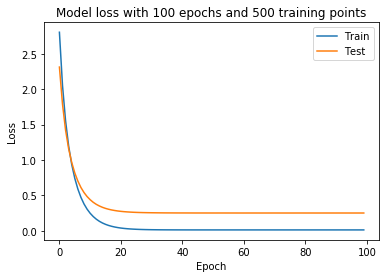

sigma=0.3


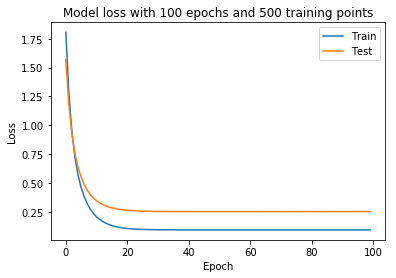

sigma=0.5


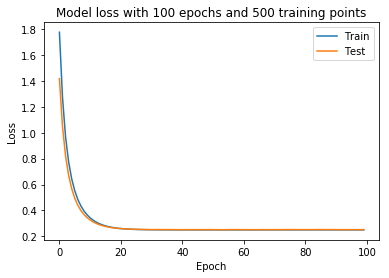

caso training points = 1000
sigma=0.1


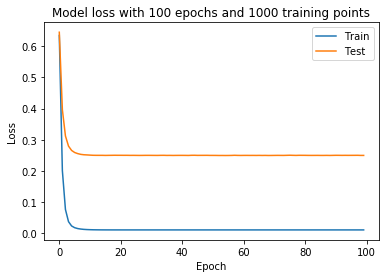

sigma=0.3


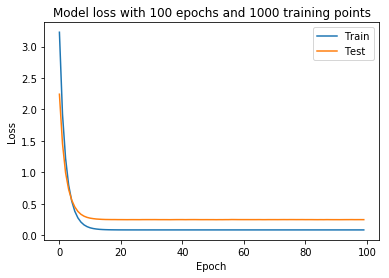

sigma=0.5


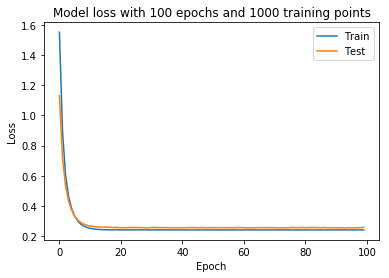

caso training points = 2000
sigma=0.1


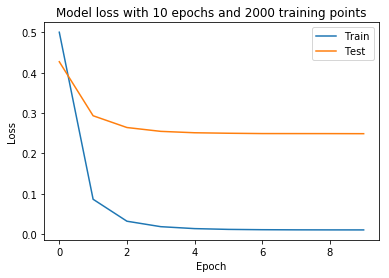

sigma=0.3


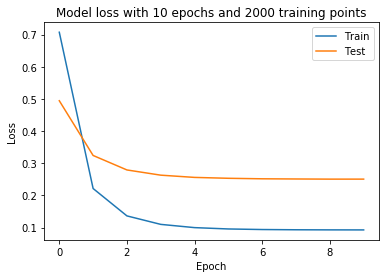

sigma=0.5


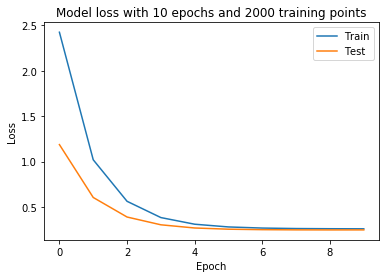

In [6]:
x=[]
y=[]
contatore=0
n_epoch =0
for k in N_train:
    if k == 500:
        n_epoch = 100
        print('caso training points = 500')
    if k== 1000:
        n_epoch=100
        print('caso training points = 1000')
    if k== 2000:
        n_epoch=10
        print('caso training points = 2000')
    for i in sigma:
        print('sigma='+str(i))
        y_train = np.random.normal(m * x_train + b, i)
        for s in range (0,k):
            x.append(x_train[s])
            y.append(y_train[s])
        model_prova = tf.keras.Sequential()
        model_prova.add(Dense(1, input_shape=(1,)))
        model_prova.compile(optimizer='sgd', loss='mse', metrics=['mse'])
        history = model_prova.fit(x=x, y=y, batch_size=32, epochs=n_epoch, 
                                shuffle=True, validation_data=(x_valid, y_valid), verbose=0)
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('Model loss with ' +str(n_epoch)+ ' epochs and ' +str(k)+' training points')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Test'], loc='best')
        plt.show()
            
        x[0:np.size(x)] = []
        y[0:np.size(y)]=[]

### <font color='black'>Esercizio 11.2

Per questa secondo esercizio, abbiamo esteso il modello fornito con lo scopo di fittare la seguente funzione polinomiale:
$$
f(x)=4-3x-2x^2+3x^3
$$
per $x \in [-1,1]$.



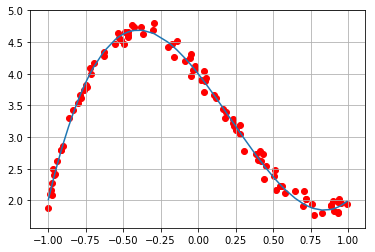

In [7]:
sigma2 = 0.1
N_epoch2=500

np.random.seed(0)
x_tr2 = np.random.uniform(-1, 1, 1000) #genera 100 punti distrbuiti unif
x_val2 = np.random.uniform(-1, 1, 100) #genera 10 pti distribuiti unif
x_val2.sort()
y_ta2 = 4.0-3.0* x_val2 - 2.0 * x_val2**2 + 3.0 * x_val2**3 # ideal (target) linear function

y_tr2 = np.random.normal(4.0- 3.0 * x_tr2 - 2.0*x_tr2**2 + 3.0*x_tr2**3 , sigma2)
y_val2 = np.random.normal(4.0- 3.0 * x_val2 - 2.0*x_val2**2 + 3.0*x_val2**3, sigma2)
plt.plot(x_val2, y_ta2)
plt.scatter(x_val2, y_val2, color='r')
plt.grid(True);
plt.show()

In [8]:
x_val3 = np.random.uniform(-2, 2, 100) 
x_val3.sort()
y_ta3 = 4.0-3.0* x_val3 - 2.0 * x_val3**2 + 3.0 * x_val3**3 

Come prima cosa abbiamo guardato come il numero di layer ($N_{layers}$) e in numero di neuroni ($N_{nodes}$) per layer fossero legati alla funzione di attivazione. Pochè la funzione polinomiale da fittare è di grado tre, abbiamo deciso di usare un numero relativamente piccolo per $N_{layers}$ e $N_{nodes}$ in modo che le reti costruite non fossero troppo complesse rispetto al problema posto. I valori scelti sono stati

$N_{layers}=3$, $5$

$N_{nodes}=2$, $4$, $5$

Le funzioni di attivazione scelte sono state:

activation function$=$ relu, sigmoid, tanh

Per ognuna delle funzioni di attivazione scelta sono state costruite delle reti neurali per ogni combinazione di $N_{layers}$ e $N_{nodes}$, mediante il seguente codice. Mostriamo di seguito il codice con i grafici.

number of layers= 3 number of nodes in each layer=2act= relu


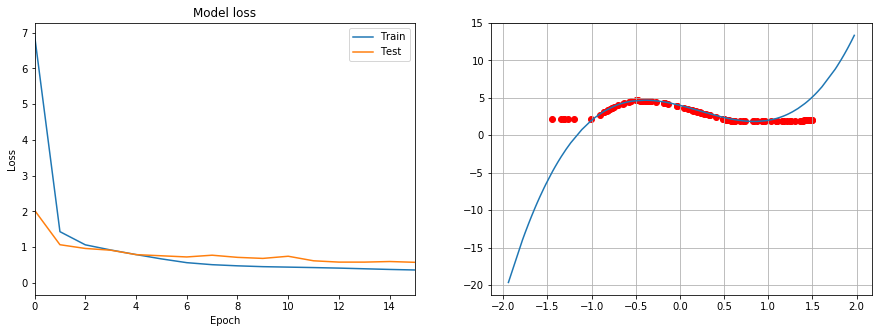

number of layers= 3 number of nodes in each layer=4act= relu


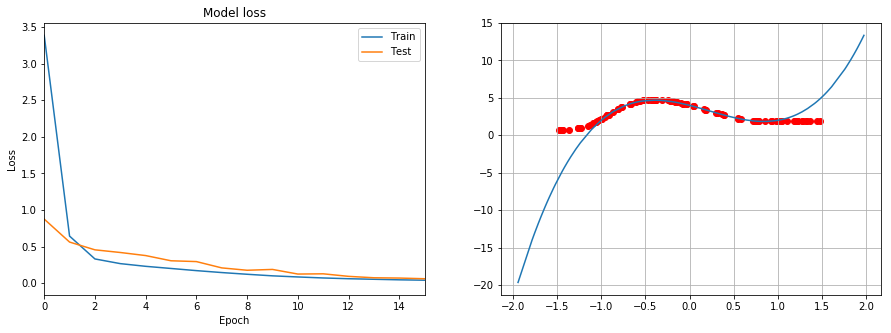

number of layers= 3 number of nodes in each layer=5act= relu


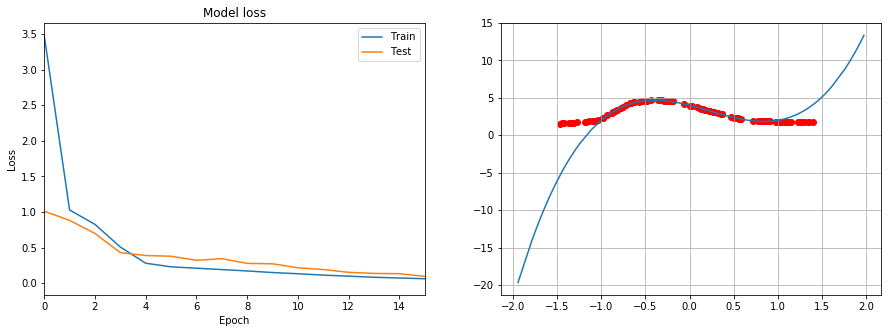

number of layers= 5 number of nodes in each layer=2act= relu


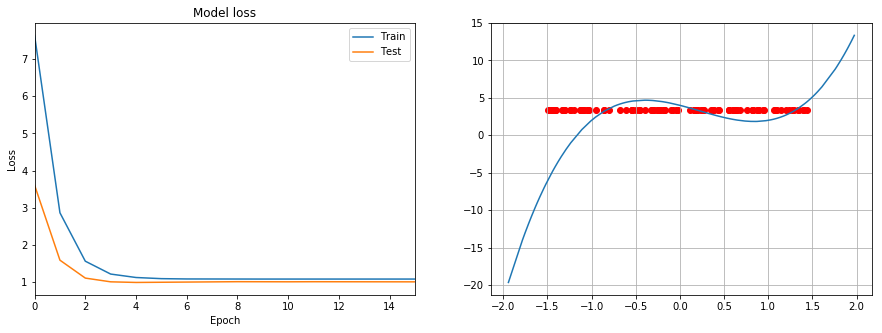

number of layers= 5 number of nodes in each layer=4act= relu


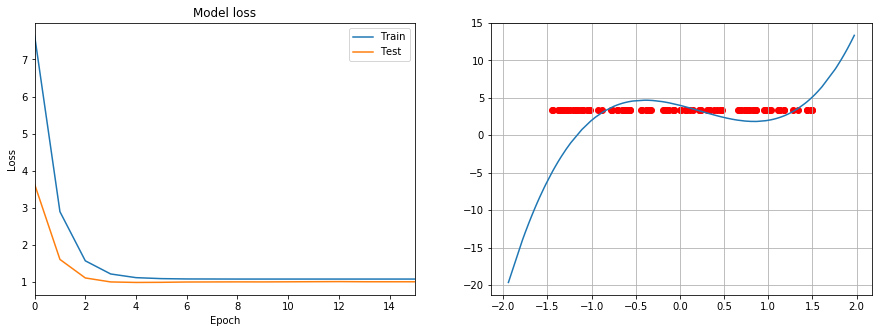

number of layers= 5 number of nodes in each layer=5act= relu


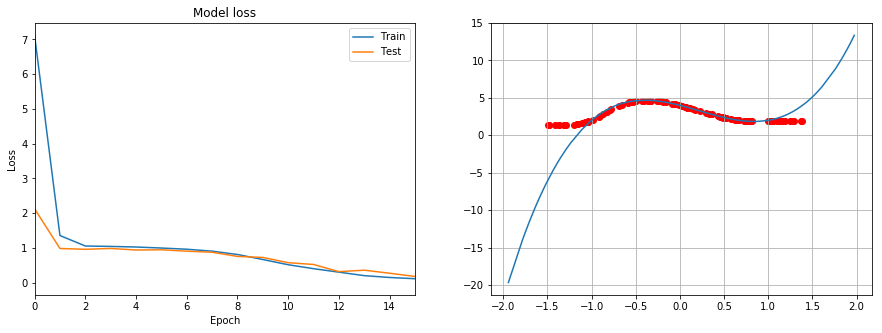

number of layers= 3 number of nodes in each layer=2act= sigmoid


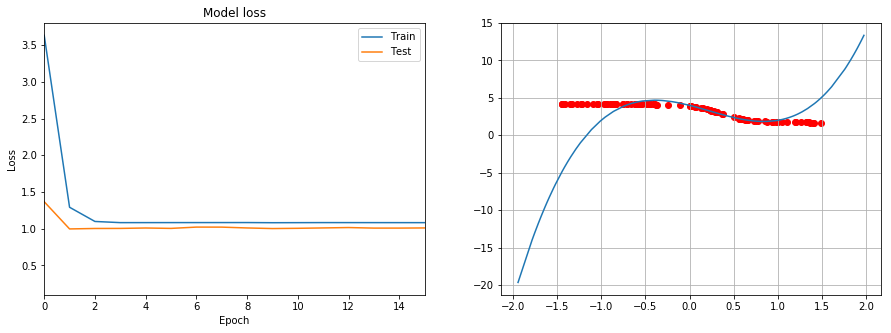

number of layers= 3 number of nodes in each layer=4act= sigmoid


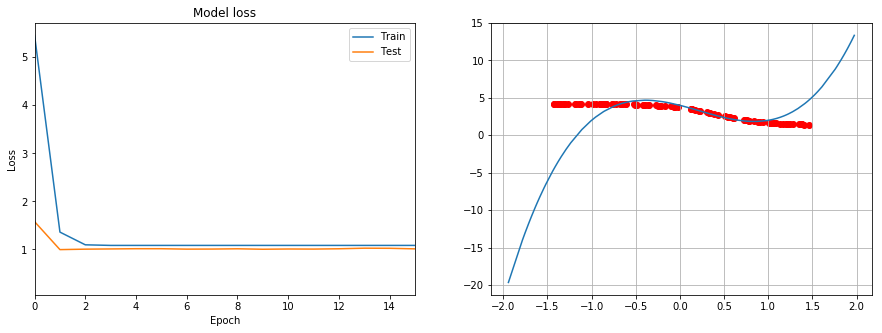

number of layers= 3 number of nodes in each layer=5act= sigmoid


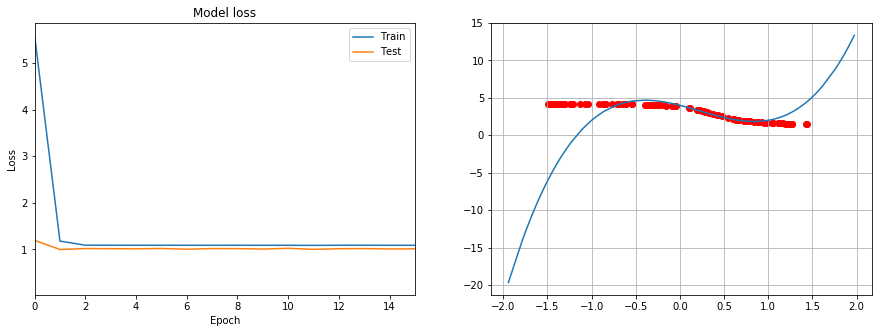

number of layers= 5 number of nodes in each layer=2act= sigmoid


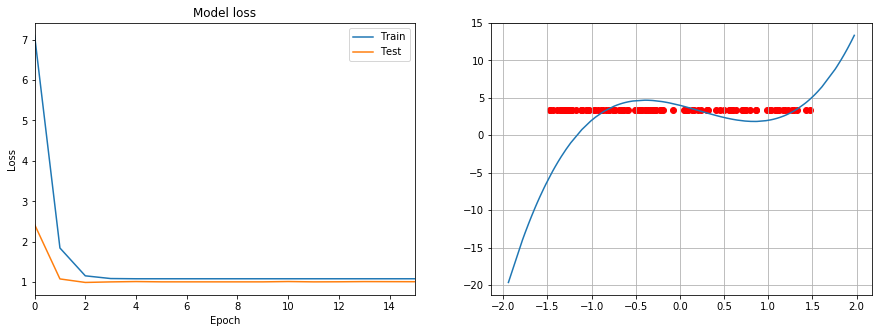

number of layers= 5 number of nodes in each layer=4act= sigmoid


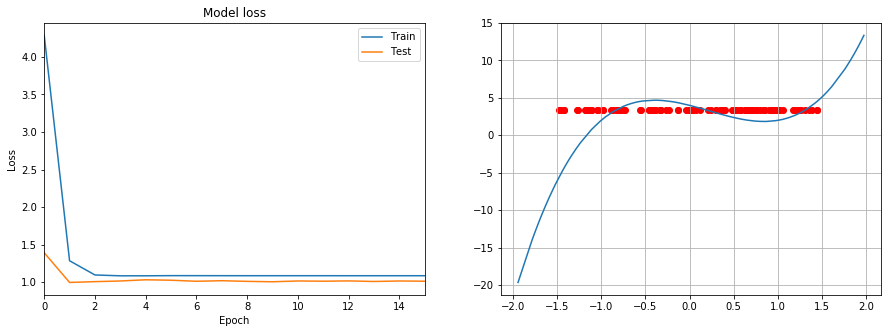

number of layers= 5 number of nodes in each layer=5act= sigmoid


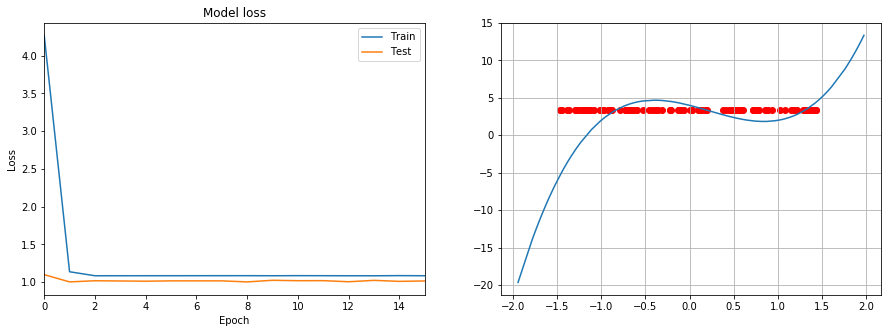

number of layers= 3 number of nodes in each layer=2act= tanh


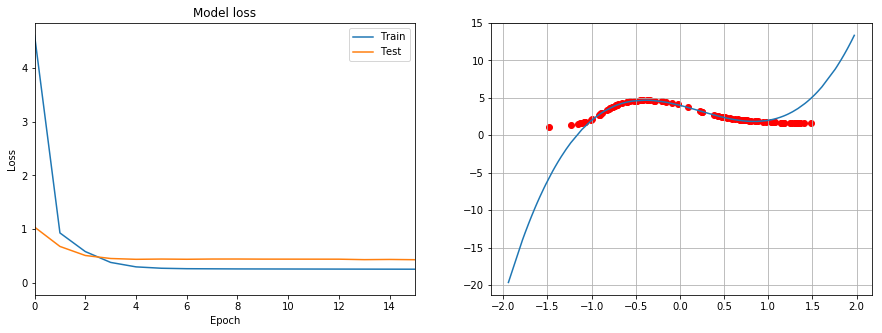

number of layers= 3 number of nodes in each layer=4act= tanh


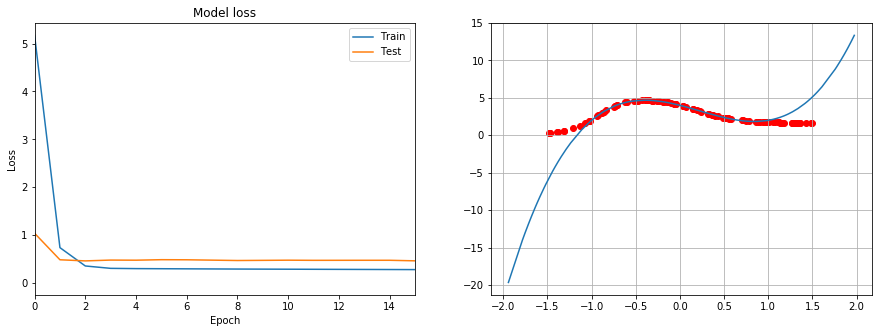

number of layers= 3 number of nodes in each layer=5act= tanh


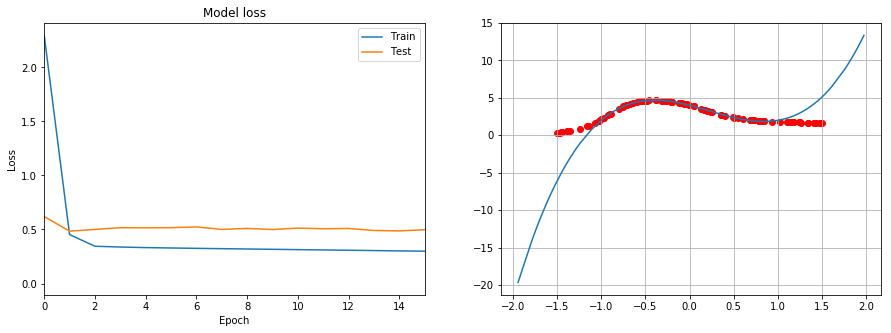

number of layers= 5 number of nodes in each layer=2act= tanh


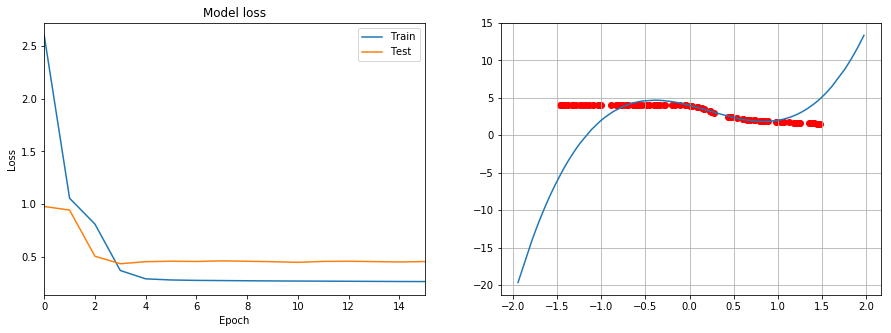

number of layers= 5 number of nodes in each layer=4act= tanh


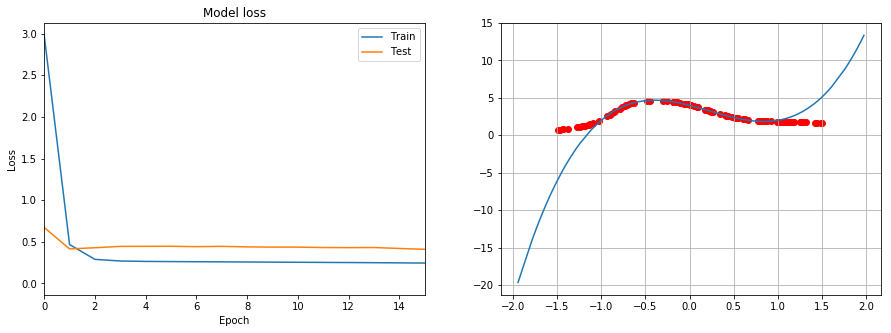

number of layers= 5 number of nodes in each layer=5act= tanh


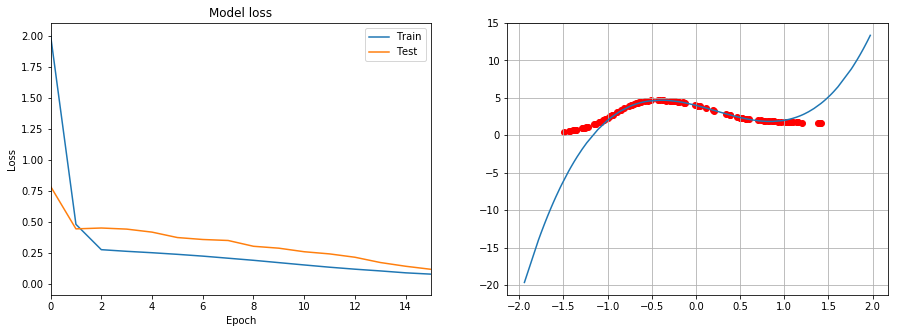

In [9]:
N_layers=[3, 5]
N_nodes=[2, 4, 5]
act=['relu', 'sigmoid', 'tanh']

for s in act:
    for i in N_layers:
        for j in N_nodes:
            model2 = tf.keras.Sequential()
            model2.add(Dense(j, input_shape=(1,), activation=s)) #input layer
            for k in range(0,i):
                model2.add(Dense(j, activation=s)) #hidden layers
            model2.add(Dense(1)) #output layer
        
            model2.compile(optimizer='sgd', loss='mse', metrics=['mse'])
            history = model2.fit(x=x_tr2, y=y_tr2, batch_size=32, epochs=N_epoch2, shuffle=True, validation_data=(x_val2, y_val2), verbose=0)
 
            plt.figure(figsize=(15,5))
            plt.subplot(1,2,1)
            print('number of layers= '+str(i)+' number of nodes in each layer='+str(j)+ 'act= '+ str(s))
            plt.plot(history.history['loss'])
            plt.plot(history.history['val_loss'])
            plt.title('Model loss')
            plt.xlim((0, 15))
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.legend(['Train', 'Test'], loc='best')
            plt.subplot(1,2,2)
            x_predicted_2 = np.random.uniform(-1.5, 1.5, 100)
            y_predicted_2 = model2.predict(x_predicted_2)
            plt.scatter(x_predicted_2, y_predicted_2,color='r')
            plt.plot(x_val3, y_ta3)
            plt.grid(True)
            plt.show()     

Notiamo che nessuna delle reti costruite ha un buon potere predittivo al di fuori del range in cui è stato fatto il training. Studiamo ora come il potere predittivo della rete varia al variare della loss function.

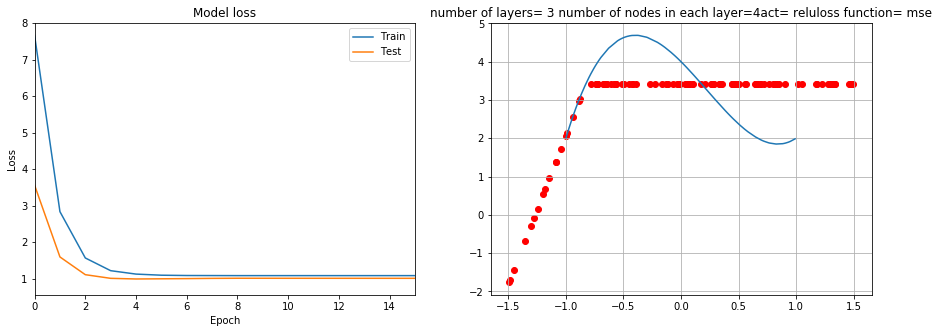

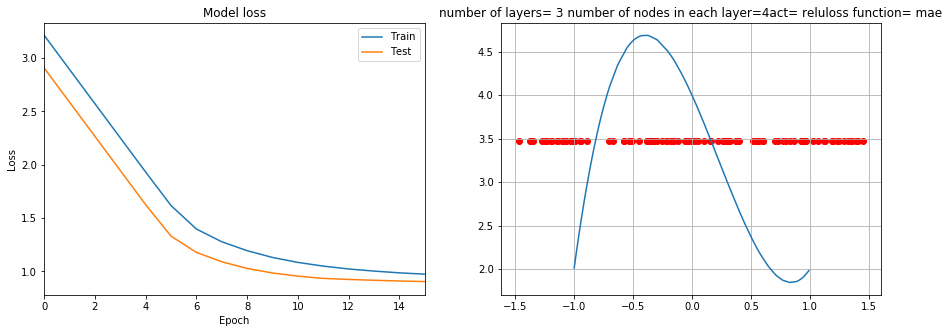

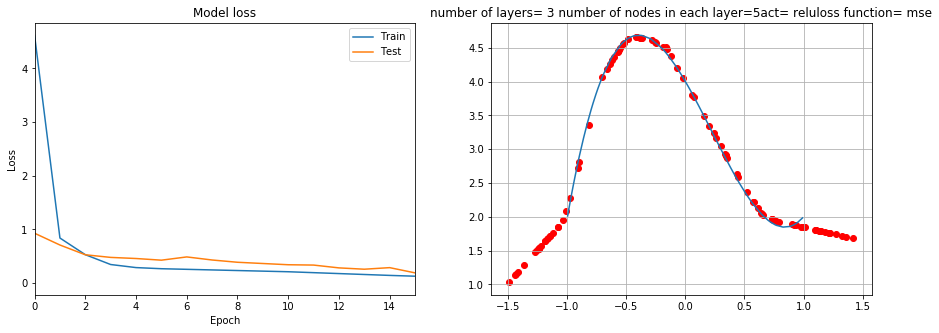

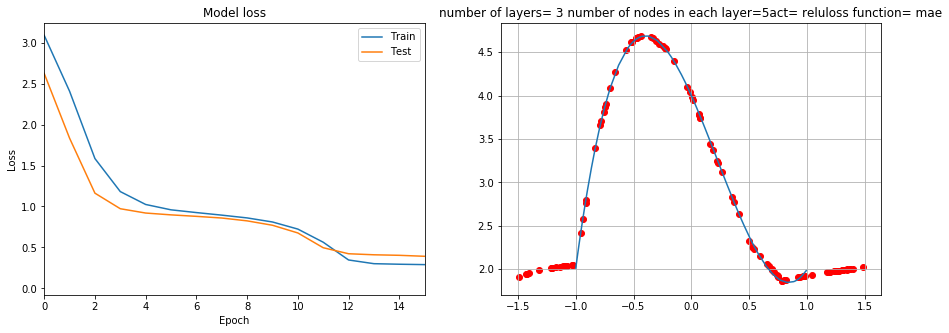

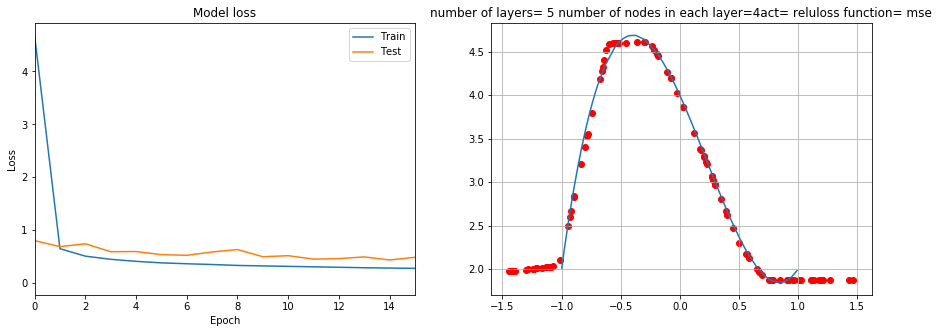

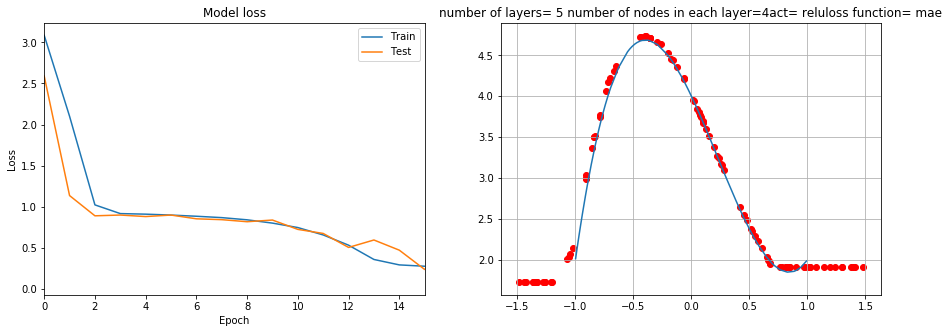

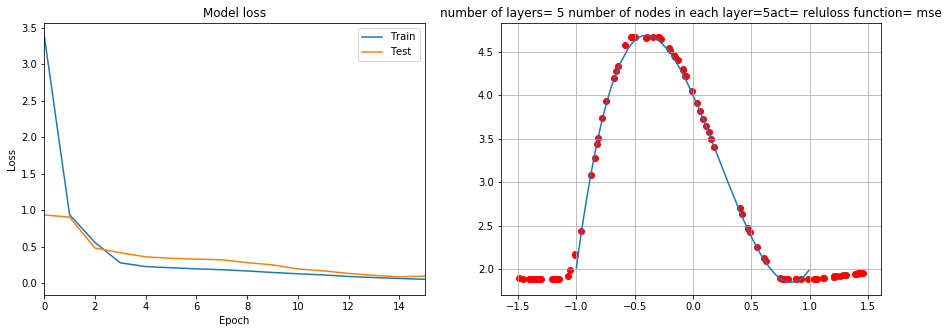

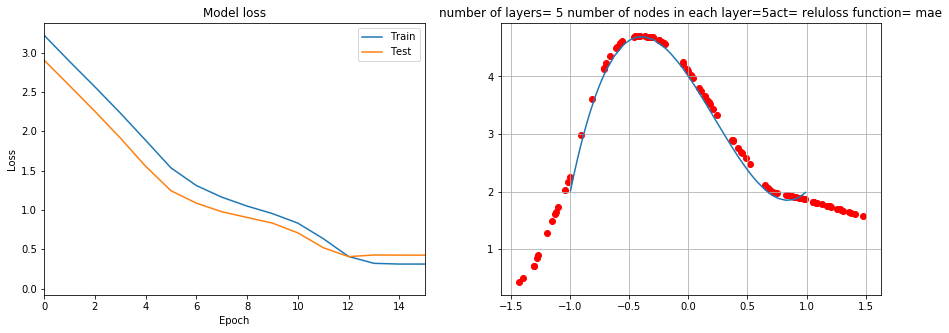

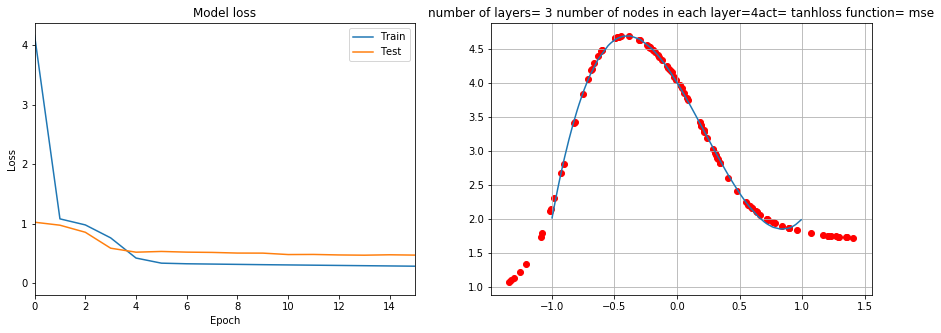

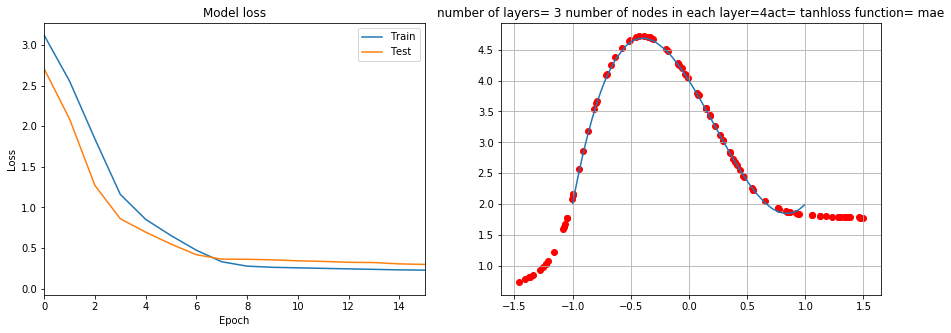

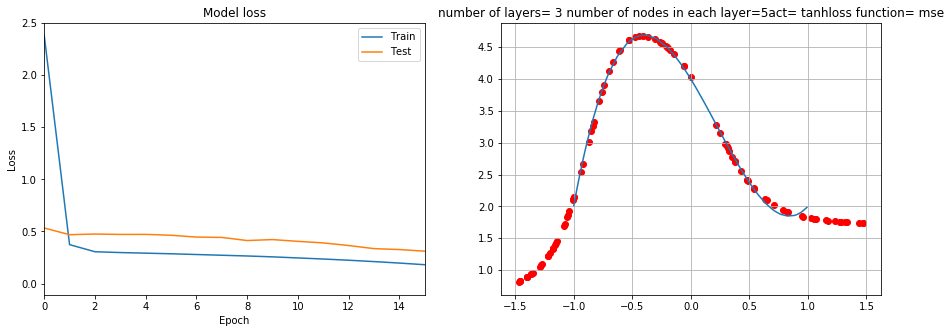

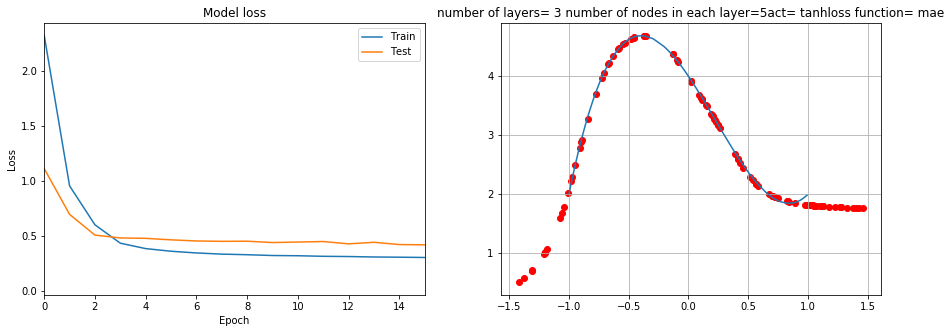

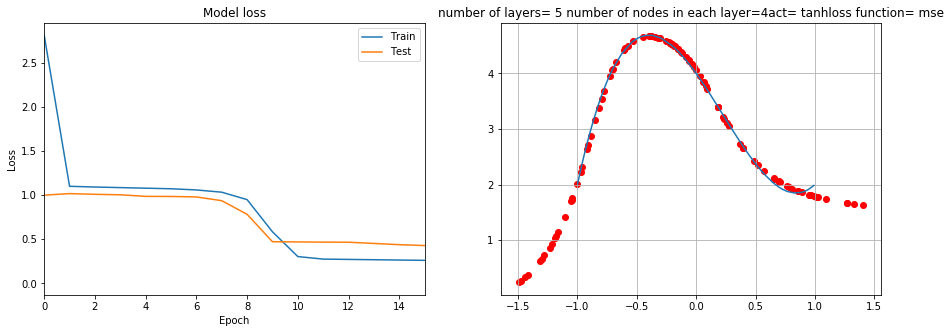

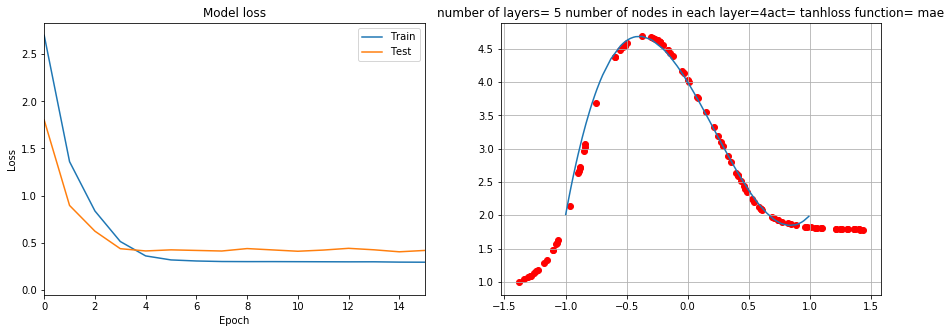

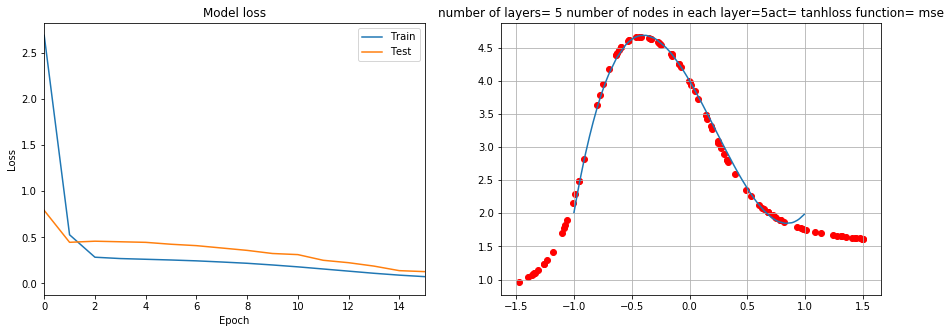

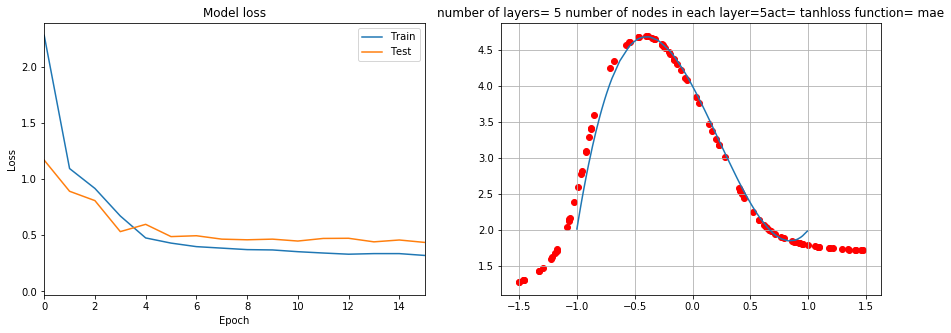

In [10]:
N_layers=[3,5]
N_nodes=[4,5]
act_fnc=['relu','tanh']
opt=['sgd']
loss_fnc=['mse', 'mae']


for i in act_fnc:
    for dd in N_layers:
        for pp in N_nodes:
            for j in opt:
                for l in loss_fnc:
                    model3 = tf.keras.Sequential()
                    #input layer
                    model3.add(Dense(pp, input_shape=(1,), activation=i))
                    #hidden layers
                    for k in range(0,dd):
                        model3.add(Dense(pp, activation=i))
                    #output layer
                    model3.add(Dense(1))
            
                    model3.compile(optimizer=j, loss=l, metrics=['mse'])
                    history = model3.fit(x=x_tr2, y=y_tr2, batch_size=32, epochs=N_epoch2, shuffle=True, 
                                         validation_data=(x_val2, y_val2), verbose=0)
                    
                    plt.figure(figsize=(15,5))
                    plt.subplot(1,2,1)
                    plt.plot(history.history['loss'])
                    plt.plot(history.history['val_loss'])
                    plt.title('Model loss')
                    plt.ylabel('Loss')
                    plt.xlabel('Epoch')
                    plt.xlim((0, 15))
                    plt.legend(['Train', 'Test'], loc='best')
                    plt.subplot(1,2,2)
                    plt.title('number of layers= '+str(dd)+' number of nodes in each layer='+str(pp)+ 
                              'act= '+ str(i)+ 'loss function= '+str(l))
                    x_predicted2 = np.random.uniform(-1.5, 1.5, 100)
                    y_predicted2 = model3.predict(x_predicted2)
                    plt.scatter(x_predicted2, y_predicted2, color='r')
                    plt.plot(x_val2, y_ta2)
                    plt.grid(True)
                    plt.show()

Anche in questo caso le reti costruite non sono in grado di predirre al meglio il valore dei target $y$ per valorei di $x$ al di fuori del range in cui è stato fatto il training. La rete combinazione che ci sembra migliore è quella con 3 layers, 5 nodi in ogni layer, funzione di attivazione tanh, e loss function errore assoluto medio.

### <font color='black'>Esercizio 11.3
Nell'ultima parte di questo eserizio abbiamo esteso il modello per poter fare il fit della seguente funzione:
    $f(x,y) = \sin(x^2+y^2)$ nell'intervallo
    $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [25]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

In [4]:
sigma3 = 0.1
N_epoch=30
N_tr=100
N_val=10

x1_tr=np.random.uniform(-3/2, 3/2, N_tr)
x1_val=np.random.uniform(-3/2, 3/2, N_val)
x1_val.sort()

x2_tr=np.random.uniform(-3/2, 3/2, N_tr)
x2_val=np.random.uniform(-3/2, 3/2, N_val)
x2_val.sort()

f_tr=np.random.normal(np.sin(x1_tr*x1_tr+x2_tr*x2_tr), sigma3)
f_val=np.random.normal(np.sin(x1_val*x1_val+x2_val*x2_val), sigma3)
f_tar=np.sin(x1_val*x1_val+x2_val*x2_val)



In [5]:
X_tr = np.stack([x1_tr, x2_tr], axis=1) #merged arrays
X_val=np.stack([x1_val, x2_val], axis=1)

In [117]:
layers=5
nodes=30

model_3 = tf.keras.Sequential()
for i in range(1,layers):
    model_3 = tf.keras.Sequential()
    model_3.add(Dense(nodes, input_shape=(2,), activation='tanh')) #first layer
    for k in range(0,i):
        model_3.add(Dense(nodes, activation='tanh')) #hidden layers
    
    model_3.add(Dense(1)) #terminal layer
    model_3.compile(optimizer='sgd', loss='mse', metrics=['mse'])


In [118]:
history = model_3.fit(x=X_tr, y=f_tr, batch_size=32, epochs=30, shuffle=True, validation_data=(X_val, f_val), verbose=0)

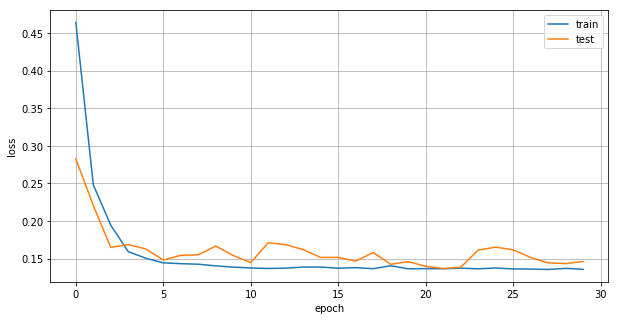

In [124]:
plt.figure(figsize = (10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

In [120]:
def f(x, y):
    return np.random.normal(np.sin(x*x+y*y), 0.1)

X, Y = np.meshgrid(x1_tr, x2_tr)
Z = f(X, Y)
z1_tr = f(x1_tr, x2_tr)

In [121]:
x = np.random.uniform(-1.5, 1.5, 300)
y = np.random.uniform(-1.5, 1.5, 300)
xy = np.transpose(np.array([x, y]))
z = model_3.predict(xy)

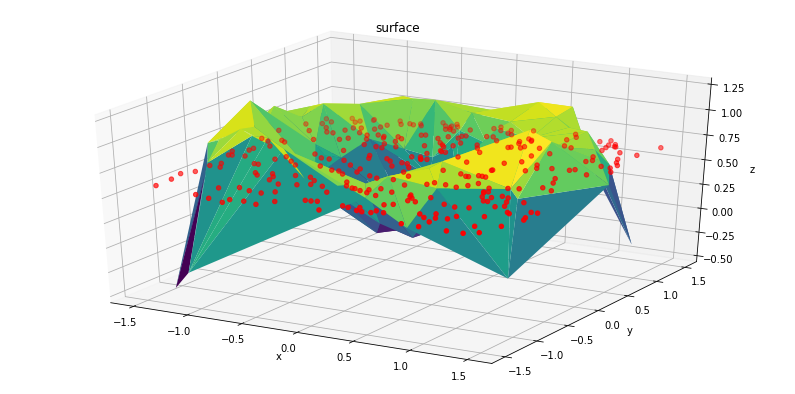

In [123]:
fig = plt.figure(figsize = (14, 7))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x1_tr, x2_tr, z1_tr, cmap='viridis', linewidth=0.2, edgecolor='none');
ax.scatter(x,y, z, color='red')
ax.set_title('surface');
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Benchè la rete abbia dei buoni risultati sull'iniseme di training e validation non è in grado di predirre accuratamente il valore del target $z$ di dati mai visti prima. 